In [10]:
import numpy as np
import pandas as pd
import time
import gc
import random
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

import math
import sympy

In [2]:
# def plot_learning_curve(
#     estimator,
#     title,
#     X,
#     y,
#     axes=None,
#     ylim=None,
#     cv=None,
#     n_jobs=None,
#     train_sizes=np.linspace(0.1, 1.0, 5),
# ):

#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")

#     train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
#         estimator,
#         X,
#         y,
#         cv=cv,
#         n_jobs=n_jobs,
#         train_sizes=train_sizes,
#         return_times=True,
#     )
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     fit_times_mean = np.mean(fit_times, axis=1)
#     fit_times_std = np.std(fit_times, axis=1)

#     print("final train_scores_mean=", train_scores_mean[-1])
#     print("final test_scores_mean=", test_scores_mean[-1])
#     # Plot learning curve
#     axes[0].grid()
#     axes[0].fill_between(
#         train_sizes,
#         train_scores_mean - train_scores_std,
#         train_scores_mean + train_scores_std,
#         alpha=0.1,
#         color="r",
#     )
#     axes[0].fill_between(
#         train_sizes,
#         test_scores_mean - test_scores_std,
#         test_scores_mean + test_scores_std,
#         alpha=0.1,
#         color="g",
#     )
#     axes[0].plot(
#         train_sizes, train_scores_mean, "o-", color="r", label="Training score"
#     )
#     axes[0].plot(
#         train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
#     )
#     axes[0].legend(loc="best")

# #     print("train_sizes", train_sizes)
#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, "o-")
#     axes[1].fill_between(
#         train_sizes,
#         fit_times_mean - fit_times_std,
#         fit_times_mean + fit_times_std,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[2].grid()
#     axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[2].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

#     return plt

In [3]:
%load_ext autoreload
%autoreload 2
import tests as tests

%matplotlib inline

In [4]:
class Data():
    
    # points [1]
    def dataAllocation(self,path):
        df = pd.read_csv(path)
        x_data = df.iloc[:, 0:-1]
        y_data = df.iloc[:, -1:].squeeze()
        # ------------------------------- 
        return x_data,y_data
    
    # points [1]
    def trainSets(self,x_data,y_data):
        x_train, x_test = train_test_split(x_data, shuffle=True,  test_size=0.3)
        y_train, y_test = train_test_split(y_data, shuffle=True,  test_size=0.3)
        # -------------------------------
        return x_train, x_test, y_train, y_test

##################################################
##### Do not add anything below this line ########
tests.dataTest(Data)
##################################################

dataAllocation Function Executed
trainSets Function Executed


In [5]:
dataset = Data()
x_data,y_data = dataset.dataAllocation('data/cleveland.csv')
x_train, x_test, y_train, y_test = dataset.trainSets(x_data,y_data)

scaler = RobustScaler(quantile_range=(2.5, 97.5)).fit(x_train.values)
scaled_x_train_num = scaler.transform(x_train.values)
scaled_x_train = pd.DataFrame(scaled_x_train_num)

scaled_x_test_num = scaler.transform(x_test.values)
scaled_x_test = pd.DataFrame(scaled_x_test_num)

In [7]:
import numpy as np

class NeuralNetwork:
    def __init__(self, learning_rate, n_fields):
        list1 = []
        for n in range(n_fields):
            list1.append(np.random.randn())
        self.weights = np.array(list1)
        self.weights2 = np.array([np.random.randn(), np.random.randn()])
#         print(self.weights)
#         print(self.weights2)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
#         return x
#         temp = [max(0,value) for value in x]
#         return np.array(temp, dtype=float)
        if x>0:
            return x
        else:
            return 0
    def _sigmoid_deriv(self, x):
#         return self._sigmoid(x) * (1 - self._sigmoid(x))
# #         return 1
        if x>0:
            return 1
        else:
            return 0
#         temp = [1 if value>0 else 0 for value _in x]
#         return np.array(temp, dtype=float)

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
            
        return prediction
#         return prediction.round()
#         return math.ceil(prediction)

    def predictAll(self, input_vectors):
        list = []
        for i in range(len(input_vectors)):
#             print("predictAll()   input_vectors[i]", input_vectors[i])
            p = self.predict(input_vectors[i])
            list.append(p)
        prediction = np.array(list)

        return prediction.round()
    
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
            input_vector, target
            )

            
            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

[1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1.]
y_test.values [0 0 3 0 1 4 0 2 0 0 0 0 0 0 1 0 0 3 0 2 1 0 0 0 0 0 1 0 0 1 0 0 3 0 1 0 2
 3 0 0 1 0 2 2 0 3 0 1 0 1 4 4 1 3 2 0 0 0 3 0 0 0 2 0 0 2 3 1 3 0 0 2 0 0
 0 0 1 0 0 1 1 3 0 0 2 0 0 0 1 1]
y_predict_test [1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 2. 1. 1. 1. 1.]
test_accuracy 0.2111111111111111


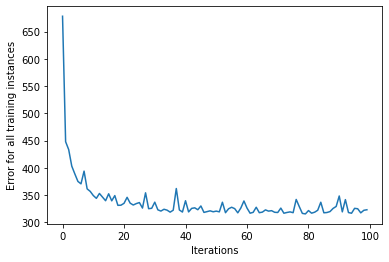

In [9]:
input_vectors = scaled_x_train.values


targets = y_train.values

learning_rate = 0.01
neural_network = NeuralNetwork(learning_rate, len(input_vectors[0]))


training_error = neural_network.train(input_vectors, targets, 10000)
# # training_error = neural_network.train(x_train, y_train, 10000)

# print(training_error)


plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

y_predict_test = neural_network.predictAll(scaled_x_test.values)
print(y_predict_test)
test_accuracy = accuracy_score(y_test.values, y_predict_test)
print("y_test.values", y_test.values)
print("y_predict_test", y_predict_test)
print("test_accuracy", test_accuracy)

In [ ]:
# # Paste the NeuralNetwork class code here
# # (and don't forget to add the train method to the class)

# import matplotlib.pyplot as plt

# input_vectors = np.array(
#     [
#         [3, 1.5],
#         [2, 1],
#         [4, 1.5],
#         [3, 4],
#         [3.5, 0.5],
#         [2, 0.5],
#         [5.5, 1],
#         [1, 1],
#     ]
# )

# targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

# learning_rate = 0.1

# neural_network = NeuralNetwork(learning_rate, 2)

# training_error = neural_network.train(input_vectors, targets, 10000)
# print("training_error", training_error)
# plt.plot(training_error)
# plt.xlabel("Iterations")
# plt.ylabel("Error for all training instances")
# plt.savefig("cumulative_error.png")



In [ ]:
# def funcx(x):
#     return x * x

# def hillclimb(func, x, target, times):

#     old_gap = abs(func(x) - target)
#     old_x= x
#     step = 0.1
# #     print("old_gap", old_gap)
# #     print("x", x)
    
#     for i in range(times):
#         r = random.random()
# #         new_x1= old_x + (old_x * step)
#         new_x1= old_x + (old_x * (step * r))
#         new_gap1 = abs(func(new_x1) - target)
# #         print("new_x1", new_x1)
# #         print("new_gap1", new_gap1)
    
# #         new_x2= old_x - (old_x * step)
#         new_x2= old_x - (old_x * (step * r))
#         new_gap2 = abs(func(new_x2) - target)
# #         print("new_x2", new_x2)
# #         print("new_gap2", new_gap2)
        
#         new_gap = 0
#         new_x = 0
#         if new_gap1 > new_gap2:
#             new_gap = new_gap2
#             new_x = new_x2
#         else:
#             new_gap = new_gap1
#             new_x = new_x1
            
# #         print("new_gap", new_x2)
# #         print("new_x", new_gap2)
        
#         if new_gap < old_gap:
#             old_gap = new_gap
#             old_x = new_x   
#         else:
# #             print("i", i)
#             return old_x
#     return old_x

# target = 3000
# y = hillclimb(funcx, 1, target, 10000)

# print("y", y)
# print("funcx(y)", funcx(y))
# print("target", target)

In [ ]:
# import sympy

# class NeuralNetworkRHC:
#     def __init__(self, learning_rate, n_fields):
#         list1 = []
#         for n in range(n_fields):
#             list1.append(np.random.randn())
#         self.weights = np.array(list1)
#         self.weights2 = np.array([np.random.randn(), np.random.randn()])
# #         print(self.weights)
# #         print(self.weights2)
#         self.bias = np.random.randn()
#         self.learning_rate = learning_rate

        

#     def hillclimb(self, func, x, target, times):

#         print("x", x)
#         old_gap = abs(func(x) - target)
#         old_x= x
#         step = 0.1

#         for i in range(times):
#             r = random.random()
#             new_x1= old_x + (old_x * (step * r))
#             new_gap1 = abs(func(new_x1) - target)
#             new_x2= old_x - (old_x * (step * r))
#             new_gap2 = abs(func(new_x2) - target)
#             new_gap = 0
#             new_x = 0
#             if new_gap1 > new_gap2:
#                 new_gap = new_gap2
#                 new_x = new_x2
#             else:
#                 new_gap = new_gap1
#                 new_x = new_x1


#             if new_gap < old_gap:
#                 old_gap = new_gap
#                 old_x = new_x   
#             else:
#                 print("i", i)
#                 return old_x
#         return old_x

#     def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
# #         return x
# #         temp = [max(0,value) for value in x]
# #         return np.array(temp, dtype=float)
# #         if x>0:
# #             return x
# #         else:
# #             return 0.0
#     def _sigmoid_deriv(self, x):
#         return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    
# #     def _sigmoid(self, x):
# # #         return x
# # #         print("_sigmoid x", x)
# # #         print("_sigmoidsympy.Max(x, 0)", sympy.Max(x, 0))
# # #         print("_sigmoid round(sympy.Max(x, 0))", round(sympy.Max(x, 0)))
# # #         y = round(sympy.Max(x, 0))
# # #         return y
# #         return sympy.Max(x, 0)
# # #         if x>0:
# # #             return x
# # #         else:
# # #             return 0
# #     def _sigmoid_deriv(self, x):
# #          return 1
# # #         if x>0:
# # #             return 1
# # #         else:
# # #             return 0

        
#     def predict(self, input_vector):
#         layer_1 = np.dot(input_vector, self.weights) + self.bias
# #         print("layer_1", layer_1)
#         layer_2 = self._sigmoid(layer_1)
#         prediction = layer_2
#         return prediction

#     def predictAll(self, input_vectors):
#         list = []
#         for i in range(len(input_vectors)):
# #             print("predictAll()   input_vectors[i]", input_vectors[i])
#             p = self.predict(input_vectors[i])
#             list.append(p)
# #             layer_1 = np.dot(input_vectors[i], self.weights) + self.bias
# #             print("predictAll()   layer_1", layer_1)
# #             layer_2 = self._sigmoid(layer_1)
# #             list.append(layer_2)
# #         print("predictAll ()   list", list)
#         prediction = np.array(list)

# #         if prediction > 0:
# #             return prediction.round()

#         return prediction.round()
# #         try: 
# #             if prediction > 0:
# #                 return prediction.round()
# # #             else:
# #             return prediction.round()
# #         except Exception as e:
# #             print("prediction", prediction)
# #             print(e)


#     def _compute_gradients(self, input_vector, target):
# #         layer_1 = np.dot(input_vector, self.weights) + self.bias
# #         layer_2 = self._sigmoid(layer_1)
# #         prediction = layer_2

# #         derror_dprediction = 2 * (prediction - target)
# #         dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
# #         dlayer1_dbias = 1
# #         dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

# #         derror_dbias = (
# #             derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
# #         )
# #         derror_dweights = (
# #             derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
# #         )

#         layer_1 = np.dot(input_vector, self.weights) + self.bias
#         prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
#         old_gap = abs(prediction - target)
# #         print("old_gap", old_gap)
# #         old_gap = 10000000
    
#         old_x = self.weights
#         predict = 0
# #         print("target", target)
#         for i in range(2):
# # #             layer_1 = np.dot(input_vector, self.weights) + self.bias
# #             prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
# # #             prediction = layer_2
                
# # #             derror_dprediction = 2 * (prediction - target)
# #             old_gap = abs(prediction - target)
#             step = 2
#             r = random.random()
#             new_x1= old_x + (old_x * (step * r))
#             layer_1_1 = np.dot(input_vector, new_x1) + self.bias
# #             print("layer_1_1", layer_1_1)
# #             predict1 = self._sigmoid(np.dot(input_vector, new_x1) + self.bias)
#             predict1 = self._sigmoid(layer_1_1)
#             new_gap1 = abs(predict1 - target)
#             new_x2= old_x - (old_x * (step * r))
#             layer_1_2 = np.dot(input_vector, new_x2)
# #             print("layer_1_2", layer_1_2)
# #             predict2 = self._sigmoid(np.dot(input_vector, new_x2) + self.bias)
#             predict2 = self._sigmoid(layer_1_2)
#             new_gap2 = abs(predict2 - target)
#             new_gap = 0
#             new_x = 0
#             new_predict = 0
# #             print("i", i)
# #             print("old_gap", old_gap)
# #             print("old_x", old_x)
# #             print("predict", predict)
 
# #             print("new_x1", new_x1)
# #             print("predict1", predict1)
# #             print("new_gap1", new_gap1)
# #             print("new_x2", new_x2)
# #             print("predict2", predict2)
# #             print("new_gap2", new_gap2)
#             if new_gap1 > new_gap2:
#                 new_gap = new_gap2
#                 new_x = new_x2
#                 new_predict = predict2
#                 new_layer_1 = layer_1_2
#             else:
#                 new_gap = new_gap1
#                 new_x = new_x1
#                 new_predict = predict1
#                 new_layer_1 = layer_1_1

#             if new_gap < old_gap:
#                 old_gap = new_gap
#                 old_x = new_x   
#                 predict = new_predict   
#                 layer_1 = new_layer_1
# #                 print("SWITCH new_gap", new_gap)
# #                 print("old_gap", new_gap)
#             else:
# #                 print("SKIP new_gap", new_gap)
# #                 print("old_gap", new_gap)
#                 break
            
# #         layer_1 = np.dot(input_vector, old_x) + self.bias
# #         derror_dprediction = old_gap;
#         derror_dprediction = 2 * (prediction - target)

#         dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
#         dlayer1_dbias = 1
#         dlayer1_dweights = (0 * self.weights) + (1 * input_vector)
# #         dlayer1_dweights = old_x.copy()

#         derror_dbias = (
#             derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
#         )
#         derror_dweights = (
#             derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
#         )
        
        
#         return derror_dbias, derror_dweights

    
#     def _predictX(self, input_vector):
#         layer_1 = np.dot(input_vector, self.weights) + self.bias
#         return self._sigmoid(layer_1)
        
        
# #     def _compute_gradientsRHC(self, input_vector, target):
# # #         layer_1 = np.dot(input_vector, self.weights) + self.bias
# # #         layer_2 = self._sigmoid(layer_1)
# # #         prediction = layer_2

# #         prediction = self.hillclimb(self._predictX, input_vector, target, 100)

# #         derror_dprediction = 2 * (prediction - target)
# #         dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
# #         dlayer1_dbias = 1
# #         dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

# #         derror_dbias = (
# #             derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
# #         )
# #         derror_dweights = (
# #             derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
# #         )

# #         return derror_dbias, derror_dweights
    
#     def _update_parameters(self, derror_dbias, derror_dweights):
#         self.bias = self.bias - (derror_dbias * self.learning_rate)
#         self.weights = self.weights - (
#             derror_dweights * self.learning_rate
#         )
# #         self.bias = self.bias - (derror_dbias)
# #         self.weights = self.weights - (
# #             derror_dweights
# #         )

# #     def _update_parametersRHC(self, derror_dbias, derror_dweights):
# #         self.bias = self.bias - (derror_dbias)
# #         self.weights = self.weights - (
# #             derror_dweights
# #         )
        
#     def train(self, input_vectors, targets, iterations):
#         cumulative_errors = []
#         for current_iteration in range(iterations):
#             # Pick a data instance at random
#             random_data_index = np.random.randint(len(input_vectors))

#             input_vector = input_vectors[random_data_index]
#             target = targets[random_data_index]

#             # Compute the gradients and update the weights
#             derror_dbias, derror_dweights = self._compute_gradients(
#             input_vector, target
#             )
            
#             self._update_parameters(derror_dbias, derror_dweights)

#             # Measure the cumulative error for all the instances
#             if current_iteration % 100 == 0:
# #                 print("current_iteration", current_iteration)
#                 cumulative_error = 0
#                 # Loop through all the instances to measure the error
#                 for data_instance_index in range(len(input_vectors)):
#                     data_point = input_vectors[data_instance_index]
#                     target = targets[data_instance_index]

#                     prediction = self.predict(data_point)
#                     error = np.square(prediction - target)

#                     cumulative_error = cumulative_error + error
#                 cumulative_errors.append(cumulative_error)
# #             print("cumulative_error", cumulative_error)
#         return cumulative_errors

In [ ]:
# input_vectors = scaled_x_train.values

# targets = y_train.values

# learning_rate = 0.1
# neural_network = NeuralNetworkRHC(learning_rate, len(input_vectors[0]))

# # print("SSS neural_network.weights", neural_network.weights)

# training_error = neural_network.train(input_vectors, targets, 5000)

# print("SSS training_error", training_error)

# plt.plot(training_error)
# plt.xlabel("Iterations")
# plt.ylabel("Error for all training instances")
# plt.savefig("cumulative_error.png")

# # print("SSS neural_network.weights", neural_network.weights)

# # print("SSS scaled_x_test.values", scaled_x_test.values)
# y_predict_test = neural_network.predictAll(scaled_x_test.values)
# test_accuracy = accuracy_score(y_test.values, y_predict_test)
# # print("y_test.values", y_test.values)
# # print("y_predict_test", y_predict_test)
# print("test_accuracy", test_accuracy)

In [21]:

class NeuralNetworkRHC2:
    def __init__(self, learning_rate, n_fields):
        list1 = []
        for n in range(n_fields):
            list1.append(np.random.randn())
        self.weights = np.array(list1)
        self.weights2 = np.array([np.random.randn(), np.random.randn()])
#         print(self.weights)
#         print(self.weights2)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        
    def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
        if x>0:
            return x
        else:
            return 0
    
    def _sigmoid_deriv(self, x):
#         return self._sigmoid(x) * (1 - self._sigmoid(x))
        if x>0:
            return 1
        else:
            return 0
    
    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
#         print("layer_1", layer_1)
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def predictAll(self, input_vectors):
        list = []
        for i in range(len(input_vectors)):
#             print("predictAll()   input_vectors[i]", input_vectors[i])
            p = self.predict(input_vectors[i])
            list.append(p)
        prediction = np.array(list)

        return prediction.round()

    def _compute_gradients(self, input_vector, target):

        layer_1 = np.dot(input_vector, self.weights) + self.bias
        prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
        old_gap = abs(prediction - target)
    
        old_x = self.weights
#         predict = 0
#         print("target", target)
        for i in range(2):
            step = 2
            r = random.random()
            new_x1= old_x + (old_x * (step * r))
            layer_1_1 = np.dot(input_vector, new_x1) + self.bias
#             print("layer_1_1", layer_1_1)
            predict1 = self._sigmoid(layer_1_1)
            new_gap1 = abs(predict1 - target)
            new_x2= old_x - (old_x * (step * r))
            layer_1_2 = np.dot(input_vector, new_x2)
#             print("layer_1_2", layer_1_2)
            predict2 = self._sigmoid(layer_1_2)
            new_gap2 = abs(predict2 - target)
            new_gap = 0
            new_x = 0
            new_predict = 0
            if new_gap1 > new_gap2:
                new_gap = new_gap2
                new_x = new_x2
                new_predict = predict2
                new_layer_1 = layer_1_2
            else:
                new_gap = new_gap1
                new_x = new_x1
                new_predict = predict1
                new_layer_1 = layer_1_1

            if new_gap < old_gap:
                old_gap = new_gap
                old_x = new_x   
                prediction = new_predict   
                layer_1 = new_layer_1
#                 print("SWITCH new_gap", new_gap)
#                 print("old_gap", new_gap)
            else:
#                 print("SKIP new_gap", new_gap)
#                 print("old_gap", new_gap)
                break
    
#         prediction = self.hillclimb(input_vector, target)
    
        derror_dprediction = 2 * (prediction - target)

        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )
        
        return derror_dbias, derror_dweights

    def _compute_weights(self, input_vector, target):

        layer_1 = np.dot(input_vector, self.weights) + self.bias
        prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
        old_gap = abs(prediction - target)
        org_gap = old_gap
#         print("_compute_weights() ORG ERR", old_gap)
        old_x = self.weights.copy()
#         predict = 0
#         print("target", target)
        for i in range(2):
            step = 0.1
            r = random.random()
#             new_x1= old_x + (old_x * (step * r))
            new_x1= old_x + (step * r)
            layer_1_1 = np.dot(input_vector, new_x1) + self.bias
#             print("layer_1_1", layer_1_1)
            predict1 = self._sigmoid(layer_1_1)
            new_gap1 = abs(predict1 - target)
#             new_x2= old_x - (old_x * (step * r))
            new_x2= old_x - (step * r)
            layer_1_2 = np.dot(input_vector, new_x2) + self.bias
#             print("layer_1_2", layer_1_2)
            predict2 = self._sigmoid(layer_1_2)
            new_gap2 = abs(predict2 - target)

            new_gap = 0
            new_x = 0
            new_predict = 0
            if new_gap1 > new_gap2:
                new_gap = new_gap2
                new_x = new_x2
                new_predict = predict2
                new_layer_1 = layer_1_2
            else:
                new_gap = new_gap1
                new_x = new_x1
                new_predict = predict1
                new_layer_1 = layer_1_1

                                                
#             print("old_gap", old_gap)
#             print("new_gap1", new_gap1)
#             print("new_gap2", new_gap2)
            
            
            if new_gap < old_gap:
                old_gap = new_gap
                old_x = new_x   
                prediction = new_predict   
                layer_1 = new_layer_1
#                 print("SWITCH new_gap", new_gap)
            else:
#                 print("SKIP new_gap", new_gap)
                break
    
#         prediction = self.hillclimb(input_vector, target)
        
#         print("_compute_weights() NEW ERR", old_gap)
#         print("_compute_weights() IMPROVE ERROR", org_gap - old_gap)
        return old_x

    def _compute_bias(self, input_vector, target):

        layer_1 = np.dot(input_vector, self.weights) + self.bias
        prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
        old_gap = abs(prediction - target)
        org_gap = old_gap
    
#         print("_compute_bias() ORG ERR", old_gap)
        old_x = self.bias
#         predict = 0
#         print("target", target)
        for i in range(2):
            step = 0.5
            r = random.random()
#             new_x1= old_x + (old_x * (step * r))
            new_x1= old_x + (step * r)
            layer_1_1 = np.dot(input_vector, self.weights) + new_x1
#             print("layer_1_1", layer_1_1)
            predict1 = self._sigmoid(layer_1_1)
            new_gap1 = abs(predict1 - target)
#             new_x2= old_x - (old_x * (step * r))
            new_x2= old_x - (step * r)
            layer_1_2 = np.dot(input_vector, self.weights)+ new_x2
#             print("layer_1_2", layer_1_2)
            predict2 = self._sigmoid(layer_1_2)
            new_gap2 = abs(predict2 - target)
            new_gap = 0
            new_x = 0
            new_predict = 0
            if new_gap1 > new_gap2:
                new_gap = new_gap2
                new_x = new_x2
                new_predict = predict2
                new_layer_1 = layer_1_2
            else:
                new_gap = new_gap1
                new_x = new_x1
                new_predict = predict1
                new_layer_1 = layer_1_1

            if new_gap < old_gap:
                old_gap = new_gap
                old_x = new_x   
                prediction = new_predict   
                layer_1 = new_layer_1
#                 print("SWITCH new_gap", new_gap)
#                 print("old_gap", new_gap)
            else:
#                 print("SKIP new_gap", new_gap)
#                 print("old_gap", new_gap)
                break
    
#         prediction = self.hillclimb(input_vector, target)
        
#         print("_compute_bias() NEW ERR", old_gap)
#         print("_compute_bias() IMPROVE ERROR", org_gap - old_gap)
        return old_x

    
    
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
#             derror_dbias, derror_dweights = self._compute_gradients(
#             input_vector, target
#             )
#             print("BEFORE self.weights", self.weights)
#             print("BEFORE self.bias", self.bias)
            self.weights = self._compute_weights(input_vector, target)
#             self.bias = self._compute_bias(input_vector, target)

#             print("AFTER self.weights", self.weights)
#             print("AFTER self.bias", self.bias)
            
            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
#                 print("current_iteration", current_iteration)
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
#             print("cumulative_error", cumulative_error)
        return cumulative_errors

SSS neural_network.weights [-1.06204552  0.17360453 -0.6093116  -0.2790433   0.83546811 -1.24479054
  0.35751024 -0.11719639  1.31074713  0.36597307 -1.06198314  0.66714344
 -0.96259863]
SSS neural_network.bias 1.1143585705948746
SSS neural_network.weights [-1.8341775  -0.59852745 -1.38144358 -1.05117528  0.06333614 -2.01692252
 -0.41462174 -0.88932837  0.53861516 -0.4061589  -1.83411512 -0.10498854
 -1.73473061]
SSS neural_network.bias 1.1143585705948746
y_test.values [0 0 3 0 1 4 0 2 0 0 0 0 0 0 1 0 0 3 0 2 1 0 0 0 0 0 1 0 0 1 0 0 3 0 1 0 2
 3 0 0 1 0 2 2 0 3 0 1 0 1 4 4 1 3 2 0 0 0 3 0 0 0 2 0 0 2 3 1 3 0 0 2 0 0
 0 0 1 0 0 1 1 3 0 0 2 0 0 0 1 1]
y_predict_test [1. 2. 0. 1. 4. 1. 0. 2. 2. 0. 1. 0. 3. 0. 2. 0. 1. 3. 0. 2. 1. 4. 1. 0.
 0. 2. 2. 0. 4. 0. 2. 1. 0. 0. 0. 2. 2. 1. 2. 0. 1. 3. 1. 1. 0. 1. 3. 3.
 0. 0. 0. 0. 3. 0. 3. 0. 3. 0. 1. 3. 2. 0. 2. 0. 0. 2. 0. 3. 3. 0. 0. 1.
 0. 3. 2. 0. 3. 2. 0. 1. 3. 3. 0. 1. 2. 1. 0. 0. 2. 0.]
test_accuracy 0.4222222222222222


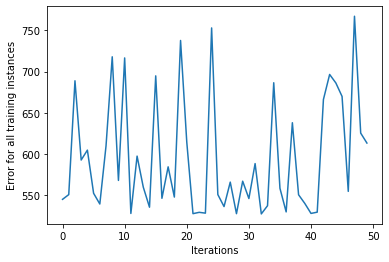

In [22]:
input_vectors = scaled_x_train.values

targets = y_train.values

learning_rate = 0.1
neural_network = NeuralNetworkRHC2(learning_rate, len(input_vectors[0]))

print("SSS neural_network.weights", neural_network.weights)
print("SSS neural_network.bias", neural_network.bias)

training_error = neural_network.train(input_vectors, targets, 5000)

# print("SSS training_error", training_error)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

print("SSS neural_network.weights", neural_network.weights)
print("SSS neural_network.bias", neural_network.bias)

# print("SSS scaled_x_test.values", scaled_x_test.values)
y_predict_test = neural_network.predictAll(scaled_x_test.values)
test_accuracy = accuracy_score(y_test.values, y_predict_test)
print("y_test.values", y_test.values)
print("y_predict_test", y_predict_test)
print("test_accuracy", test_accuracy)

In [13]:

class NeuralNetworkAN:
    def __init__(self, learning_rate, n_fields):
        list1 = []
        for n in range(n_fields):
            list1.append(np.random.randn())
        self.weights = np.array(list1)
        self.weights2 = np.array([np.random.randn(), np.random.randn()])
#         print(self.weights)
#         print(self.weights2)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.temperature = 0.9

    def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
        if x>0:
            return x
        else:
            return 0
    
    def _sigmoid_deriv(self, x):
#         return self._sigmoid(x) * (1 - self._sigmoid(x))
        if x>0:
            return 1
        else:
            return 0
    
    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
#         print("layer_1", layer_1)
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def predictAll(self, input_vectors):
        list = []
        for i in range(len(input_vectors)):
#             print("predictAll()   input_vectors[i]", input_vectors[i])
            p = self.predict(input_vectors[i])
            list.append(p)
        prediction = np.array(list)

        return prediction.round()

    def _compute_weights(self, input_vector, target):

        layer_1 = np.dot(input_vector, self.weights) + self.bias
        prediction = self._sigmoid(np.dot(input_vector, self.weights) + self.bias)
        old_gap = abs(prediction - target)
        org_gap = old_gap
#         print("_compute_weights() ORG ERR", old_gap)
        old_x = self.weights.copy()
#         predict = 0
#         print("target", target)
#         temperature = 0.9
        for i in range(2):
            step = 2
            r = random.random()
#             new_x1= old_x + (old_x * (step * r))
            new_x1= old_x + (step * r)
            layer_1_1 = np.dot(input_vector, new_x1) + self.bias
#             print("layer_1_1", layer_1_1)
            predict1 = self._sigmoid(layer_1_1)
            new_gap1 = abs(predict1 - target)
#             new_x2= old_x - (old_x * (step * r))
            new_x2= old_x - (step * r)
            layer_1_2 = np.dot(input_vector, new_x2) + self.bias
#             print("layer_1_2", layer_1_2)
            predict2 = self._sigmoid(layer_1_2)
            new_gap2 = abs(predict2 - target)

            new_gap = 0
            new_x = 0
            new_predict = 0
            if new_gap1 > new_gap2:
                new_gap = new_gap2
                new_x = new_x2
                new_predict = predict2
                new_layer_1 = layer_1_2
            else:
                new_gap = new_gap1
                new_x = new_x1
                new_predict = predict1
                new_layer_1 = layer_1_1

                                                
#             print("old_gap", old_gap)
#             print("new_gap1", new_gap1)
#             print("new_gap2", new_gap2)
            
            
            if new_gap < old_gap:
                old_gap = new_gap
                old_x = new_x   
                prediction = new_predict   
                layer_1 = new_layer_1
#                 print("SWITCH new_gap", new_gap)
            else:
#                 print("SKIP new_gap", new_gap)
                self.temperature = self.temperature * self.temperature
                r2 = random.random()
#                 print("temperature", self.temperature, "r2", r2)
                if r2 < self.temperature:
#                     print("HIGH temperature", self.temperature, "r2", r2)
                    old_gap = new_gap
                    old_x = new_x   
                    prediction = new_predict   
                    layer_1 = new_layer_1
                else:
                    break
    
#         prediction = self.hillclimb(input_vector, target)
        
#         print("_compute_weights() NEW ERR", old_gap)
#         print("_compute_weights() IMPROVE ERROR", org_gap - old_gap)
        return old_x
    
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
#             derror_dbias, derror_dweights = self._compute_gradients(
#             input_vector, target
#             )
#             print("BEFORE self.weights", self.weights)
#             print("BEFORE self.bias", self.bias)
            self.weights = self._compute_weights(input_vector, target)
#             self.bias = self._compute_bias(input_vector, target)

#             print("AFTER self.weights", self.weights)
#             print("AFTER self.bias", self.bias)
            
            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
#                 print("current_iteration", current_iteration)
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)
#             print("cumulative_error", cumulative_error)
        return cumulative_errors

SSS neural_network.weights [ 0.95623942 -0.82800079 -0.22703052  1.03454893 -0.34960211  0.14712712
  1.50114468  0.11680373  0.87998749 -0.89280988 -1.32079754 -0.38926463
  0.89105646]
SSS neural_network.weights [-4.12681797 -5.91105818 -5.31008791 -4.04850845 -5.4326595  -4.93593026
 -3.58191271 -4.96625366 -4.2030699  -5.97586727 -6.40385493 -5.47232201
 -4.19200093]
y_test.values [0 0 3 0 1 4 0 2 0 0 0 0 0 0 1 0 0 3 0 2 1 0 0 0 0 0 1 0 0 1 0 0 3 0 1 0 2
 3 0 0 1 0 2 2 0 3 0 1 0 1 4 4 1 3 2 0 0 0 3 0 0 0 2 0 0 2 3 1 3 0 0 2 0 0
 0 0 1 0 0 1 1 3 0 0 2 0 0 0 1 1]
y_predict_test [ 3.  3.  0.  0. 14.  1.  0.  8.  0.  0.  0.  0.  2.  0.  0.  0.  3. 10.
  0.  1.  3.  9.  4.  0.  0.  7. 10.  0. 10.  0.  9.  0.  0.  0.  0.  5.
  6.  0.  1.  0.  2.  4.  2.  5.  0.  2.  6.  8.  0.  0.  0.  0.  5.  0.
 12.  0.  8.  0.  0.  8.  7.  0.  4.  0.  0.  0.  0.  7. 10.  0.  0.  1.
  0.  9.  0.  0. 11.  1.  0.  0.  1.  8.  0.  0.  3.  0.  0.  0.  0.  0.]
test_accuracy 0.3888888888888889


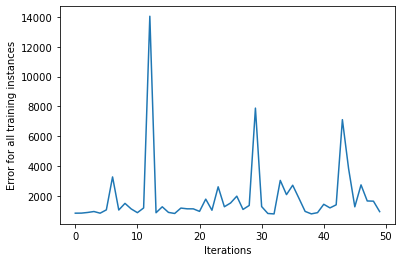

In [26]:
input_vectors = scaled_x_train.values

targets = y_train.values

learning_rate = 0.1
neural_network = NeuralNetworkAN(learning_rate, len(input_vectors[0]))

print("SSS neural_network.weights", neural_network.weights)
# print("SSS neural_network.bias", neural_network.bias)

training_error = neural_network.train(input_vectors, targets, 5000)

# print("SSS training_error", training_error)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

print("SSS neural_network.weights", neural_network.weights)
# print("SSS neural_network.bias", neural_network.bias)

# print("SSS scaled_x_test.values", scaled_x_test.values)
y_predict_test = neural_network.predictAll(scaled_x_test.values)
test_accuracy = accuracy_score(y_test.values, y_predict_test)
print("y_test.values", y_test.values)
print("y_predict_test", y_predict_test)
print("test_accuracy", test_accuracy)

In [15]:
class NeuralNetworkGen:
    def __init__(self, learning_rate, n_fields):
        list1 = []
        for n in range(n_fields):
            list1.append(np.random.randn())
        self.weights = np.array(list1)
        self.weights2 = np.array([np.random.randn(), np.random.randn()])
#         print(self.weights)
#         print(self.weights2)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
#         return 1 / (1 + np.exp(-x))
#         return x
#         temp = [max(0,value) for value in x]
#         return np.array(temp, dtype=float)
        if x>0:
            return x
        else:
            return 0
    def _sigmoid_deriv(self, x):
#         return self._sigmoid(x) * (1 - self._sigmoid(x))
# #         return 1
        if x>0:
            return 1
        else:
            return 0
#         temp = [1 if value>0 else 0 for value _in x]
#         return np.array(temp, dtype=float)

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
            
        return prediction
#         return prediction.round()
#         return math.ceil(prediction)

    def predictAll(self, input_vectors):
        list = []
        for i in range(len(input_vectors)):
#             print("predictAll()   input_vectors[i]", input_vectors[i])
            p = self.predict(input_vectors[i])
            list.append(p)
        prediction = np.array(list)

        return prediction.round()
    
    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    
    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
            input_vector, target
            )
            
            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors
    
    def mate(self, mother):
        for i in range(len(self.weights)):
            if i%2==0:
                self.weights[i] = mother.weights[i]
                
    def mutate(self, mother):
        for i in range(len(self.weights)):
            self.weights[i] = np.random.randn()


neural_network_best_err 408.2716849245458
SSS neural_network.weights [-0.71622676  2.98459513  1.7107445   1.15025908 -2.20763476 -0.43887321
  0.50290209  0.84323766  0.13680349 -1.51079604  2.28768853 -4.19105267
 -1.38617289]
SSS neural_network.bias 1.1544671314393087
y_test.values [0 0 3 0 1 4 0 2 0 0 0 0 0 0 1 0 0 3 0 2 1 0 0 0 0 0 1 0 0 1 0 0 3 0 1 0 2
 3 0 0 1 0 2 2 0 3 0 1 0 1 4 4 1 3 2 0 0 0 3 0 0 0 2 0 0 2 3 1 3 0 0 2 0 0
 0 0 1 0 0 1 1 3 0 0 2 0 0 0 1 1]
y_predict_test [1. 0. 0. 0. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 2. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0. 1. 0. 1. 0. 0.]
test_accuracy 0.4888888888888889


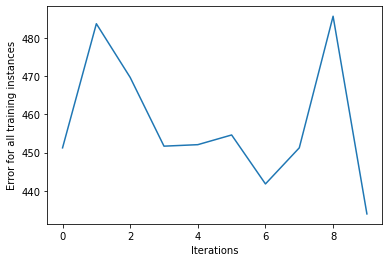

In [17]:
input_vectors = scaled_x_train.values

targets = y_train.values

learning_rate = 0.1

neural_networks = {}
training_errors = []
num_rec = 3*3
remain_range = int(num_rec/3)
mate_range = int(num_rec/3 + num_rec/3)
mutate_range = num_rec
    

neural_network_best = None
neural_network_best_err = 0

for i in range(num_rec):
    neural_networks[NeuralNetworkGen(learning_rate, len(input_vectors[0]))] = 0


num_loop = 10
for xxx in range(num_loop):
#     print("loop start", xxx)
    for n in neural_networks:
        training_error = n.train(input_vectors, targets, 1000)
    #     print(training_error[-1])
        neural_networks[n] = training_error[-1]

    neural_networks_sorted = sorted(neural_networks.items(), key=lambda x: x[1])

    if xxx == num_loop - 1:
        neural_network_best = neural_networks_sorted[0][0]
        neural_network_best_err = neural_networks_sorted[0][1]
        
#     for k, v in neural_networks_sorted:
#         print(str(v))

#     for k, v in neural_networks_sorted[0:remain_range]:
#         print(v)

    i = 0
    for k, v in neural_networks_sorted[remain_range:mate_range]:
        mother = neural_networks_sorted[i][0]
    #     print("BEFORE k.weights", k.weights)
    #     print("mother.weights", mother.weights)
        k.mate(mother)
    #     print("AFTER k.weights", k.weights)
        i+=1

    for k, v in neural_networks_sorted[mate_range:mutate_range]:
    #     print(v)
    #     print("BEFORE k.weights", k.weights)
    #     print("mother.weights", mother.weights)
        k.mutate(mother)
    #     print("AFTER k.weights", k.weights)
   
print("neural_network_best_err", neural_network_best_err)
    
print("SSS neural_network.weights", neural_network_best.weights)
print("SSS neural_network.bias", neural_network_best.bias)

# training_error = neural_network.train(input_vectors, targets, 1000)


plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

# print("SSS neural_network.weights", neural_network.weights)
# print("SSS neural_network.bias", neural_network.bias)

# print("SSS scaled_x_test.values", scaled_x_test.values)
y_predict_test = neural_network_best.predictAll(scaled_x_test.values)
test_accuracy = accuracy_score(y_test.values, y_predict_test)
print("y_test.values", y_test.values)
print("y_predict_test", y_predict_test)
print("test_accuracy", test_accuracy)